# Modelo de detección de fraude

Este notebook implementa un modelo de detección de fraude utilizando un clasificador Random Forest. El objetivo del modelo es identificar proactivamente transacciones fraudulentas en un conjunto de datos financieros.

# 1. Definición del Problema 💡

En el contexto de clasificación supervisada utilizado para este estudio de caso, la tarea principal es predecir si una transacción financiera es fraudulenta o no. La identificación de patrones y características clave es esencial para diferenciar las actividades legítimas de las fraudulentas, lo que permite optimizar la detección y prevención de fraudes en tiempo real.

Para este estudio de caso, además de los datos históricos de transacciones, las **variables independientes** utilizadas incluyen:

- **Monto de la transacción**
- **Tipo de transacción**
- **Saldo antes y después de la transacción**
- **Número de intentos de transacción**
- **Características demográficas y de comportamiento del usuario**

Estas características permiten capturar relaciones complejas y detectar anomalías en el comportamiento transaccional, lo cual es crucial para identificar fraudes de manera efectiva.

# Impacto del Proyecto

Este proyecto utiliza un modelo de aprendizaje automático basado en el clasificador **Random Forest** para detectar transacciones fraudulentas de manera eficiente. Los beneficios clave de implementar este sistema incluyen:

### 1. Reducción de Pérdidas 💰
- Al identificar transacciones fraudulentas en tiempo real, las instituciones pueden prevenir **pérdidas millonarias**.
- Un sistema efectivo de detección podría reducir hasta un **40% las pérdidas por fraude**, lo que representa **millones de dólares ahorrados anualmente**.

### 2. Seguridad y Confianza 🔐
- La detección temprana de fraudes refuerza la **seguridad** y mejora la **confianza de los usuarios**.
- En un entorno digital cada vez más competitivo, ofrecer un sistema de pagos seguro puede ser un factor diferenciador crucial para **ganar y mantener clientes**.

### 3. Automatización y Eficiencia 🤖
- El uso de un modelo **automatizado** mejora la **velocidad y precisión** del proceso, permitiendo a las empresas gestionar grandes volúmenes de transacciones sin la necesidad de intervención manual, lo que reduce **costos operativos**.

### 4. Escalabilidad 🌍
- Este sistema está diseñado para manejar **millones de transacciones**, adaptándose al crecimiento de las plataformas financieras sin perder **precisión ni eficiencia**.

## Objetivo
Con este proyecto, se busca **proteger el dinero de los usuarios**, ayudar a las **instituciones financieras** a reducir el impacto del fraude y mejorar la **fiabilidad** de sus sistemas.


# Data

El conjunto de datos utilizado para el entrenamiento y análisis se llama Fraud.csv. Tiene aproximadamente 6.5 millones de filas y 10 columnas, que contienen diversas características relacionadas con transacciones financieras.

| Variable           | Descripción                                              |
|--------------------|----------------------------------------------------------|
| **step**           | Paso temporal de la transacción (hora).       |
| **type**           | Tipo de transacción (ej. `PAYMENT`, `TRANSFER`, `CASH_OUT`). |
| **amount**         | Monto de dinero involucrado en la transacción.          |
| **nameOrig**       | Identificador de la cuenta de origen.                   |
| **oldbalanceOrg**  | Saldo de la cuenta de origen antes de la transacción.    |
| **newbalanceOrig** | Saldo de la cuenta de origen después de la transacción.  |
| **nameDest**       | Identificador de la cuenta de destino.                  |
| **oldbalanceDest** | Saldo de la cuenta de destino antes de la transacción.   |
| **newbalanceDest** | Saldo de la cuenta de destino después de la transacción. |
| **isFraud**        | Si la transacción es fraudulenta (1 = sí, 0 = no).       |
| **isFlaggedFraud** | Si la transacción fue marcada como fraudulenta (1 = sí, 0 = no). |



# Contenido

1. **Definición del problema**
2. **Cargando Librerías y el Conjunto de Datos**  
   2.1. Cargando librerías  
   2.2. Cargando los datos  
3. **Exploratory Data Analysis (EDA)**  
   3.1. Estadística descriptiva  
   3.2. Análisis Univariado  
   3.3. Análisis Bivariado  
   3.4. Visualización de datos  
      3.4.1. Correlación y Multicolinealidad  
4. **Preprocesamiento de Datos**  
   4.1. Detección de valores atípicos  
5. **Selección de características**  
   5.1. Feature Encoding  
6. **Manejo de datos desbalanceados**
7. **División del conjunto en entrenamiento y prueba**
8. **Feature Scaling**
9. **Entrenamiento y evaluación del modelo**  
   9.1. Logistic Regression  
   9.2. Random Forest  
   9.3. Support Vector Machine (SVM)  
   9.4. BernoulliNB  
   9.5. GaussianNB  
10. **Preparación del modelo para implementación**
11. **Conclusión Final**


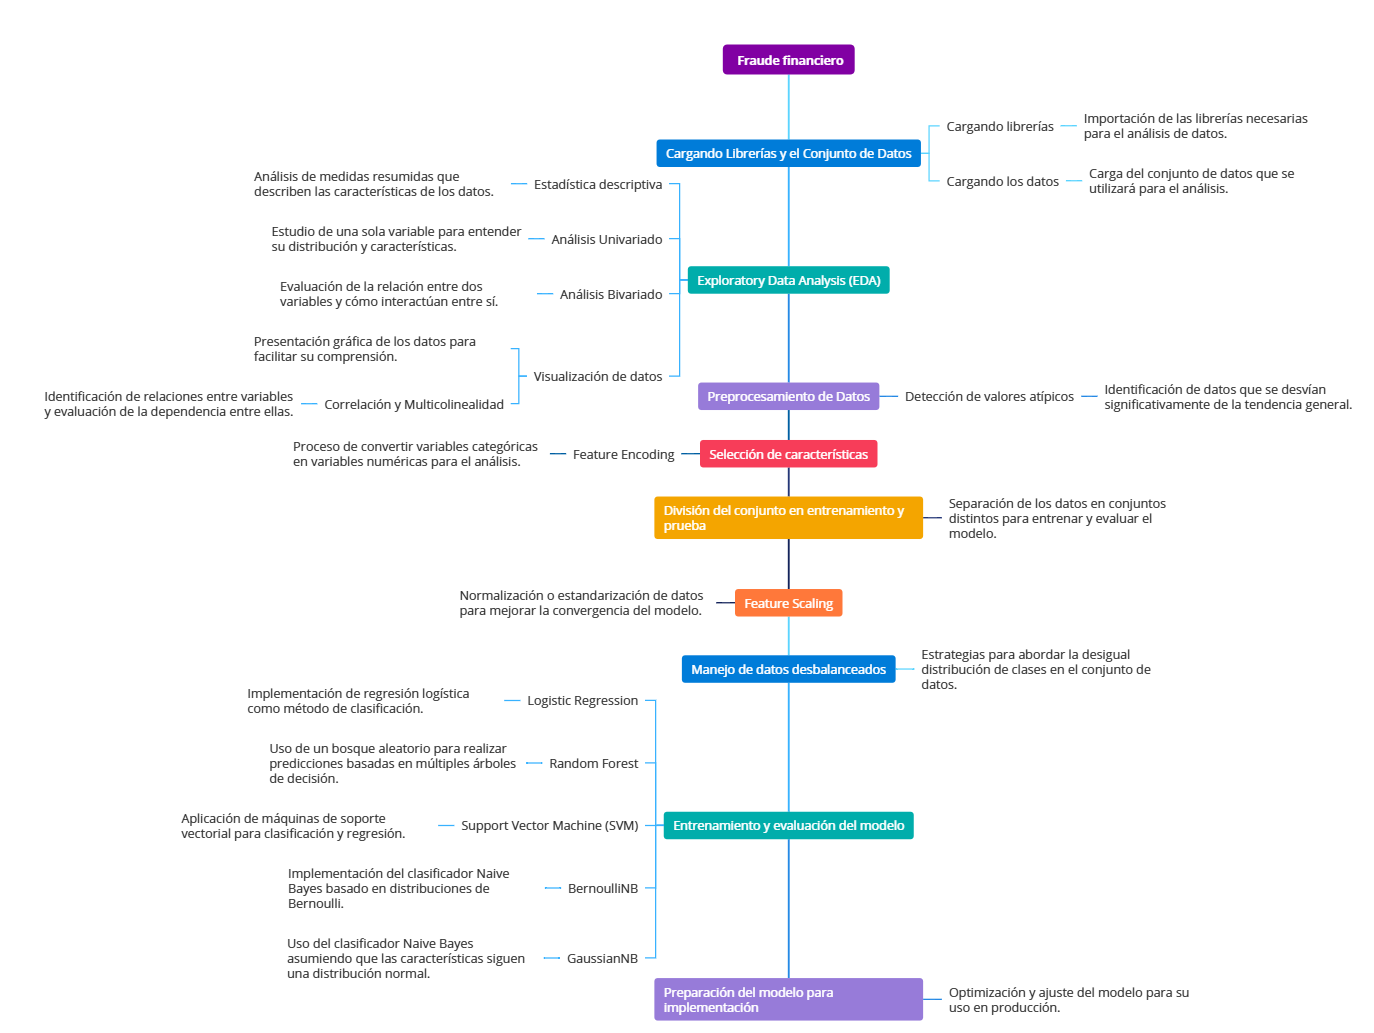

# 2. Cargando Librerias y el conjunto de datos

### 2.1. Cargando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

### 2.2. Cargando los datos

In [2]:
df=pd.read_csv('Fraud.csv')

# 3. Exploratory Data Analysis ( EDA )

### 3.1. Estadística descriptiva

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### 3.2. Análisis Univariado

In [6]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

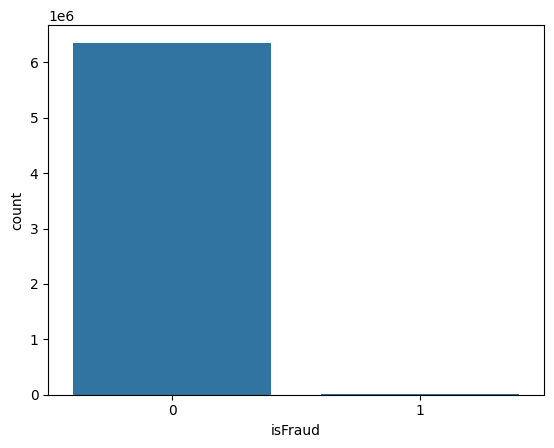

In [7]:
sns.countplot(x=df['isFraud'])
plt.show()

Este histograma muestra claramente que nuestro conjunto de datos está **altamente desbalanceado**.  

- **Observación:** La relación entre transacciones fraudulentas y transacciones normales está desequilibrada, algo que también ocurre en la vida real.  
- **Riesgo:** Si no se maneja este desbalance, impactará negativamente el entrenamiento del modelo, generando resultados sesgados hacia la clase mayoritaria (transacciones normales).  


### 3.3. Análisis Bivariado

<Axes: xlabel='step', ylabel='Count'>

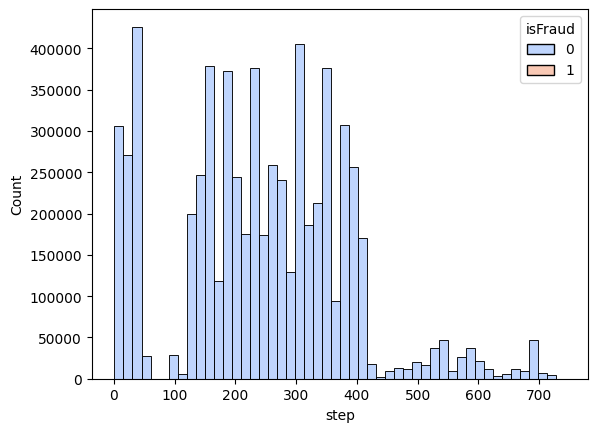

In [8]:
sns.histplot(data=df, x='step', hue='isFraud', kde=False, bins=50, palette='coolwarm', multiple='stack')


Es complicado determinar con precisión la duración temporal de las transacciones fraudulentas. Sin embargo, hemos observado que la mayoría de estas transacciones se encuentran por debajo de las 400 unidades de tiempo, donde cada unidad de tiempo corresponde a 1 hora

<Axes: xlabel='amount'>

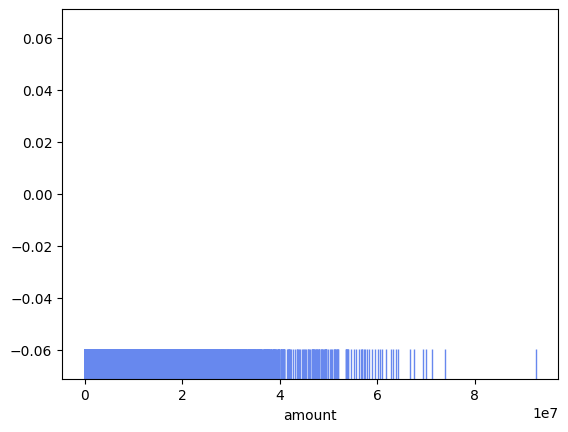

In [9]:
sns.rugplot(x='amount', data=df, height=0.08, color=sns.color_palette('coolwarm')[0])

La mayoría de las transacciones involucran montos pequeños, mientras que solo unas pocas corresponden a transferencias de grandes cantidades. Esto sugiere que las transacciones de bajo valor tienen una mayor probabilidad de ser realizadas por agentes fraudulentos.

### 3.4. Visualizacion de datos

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

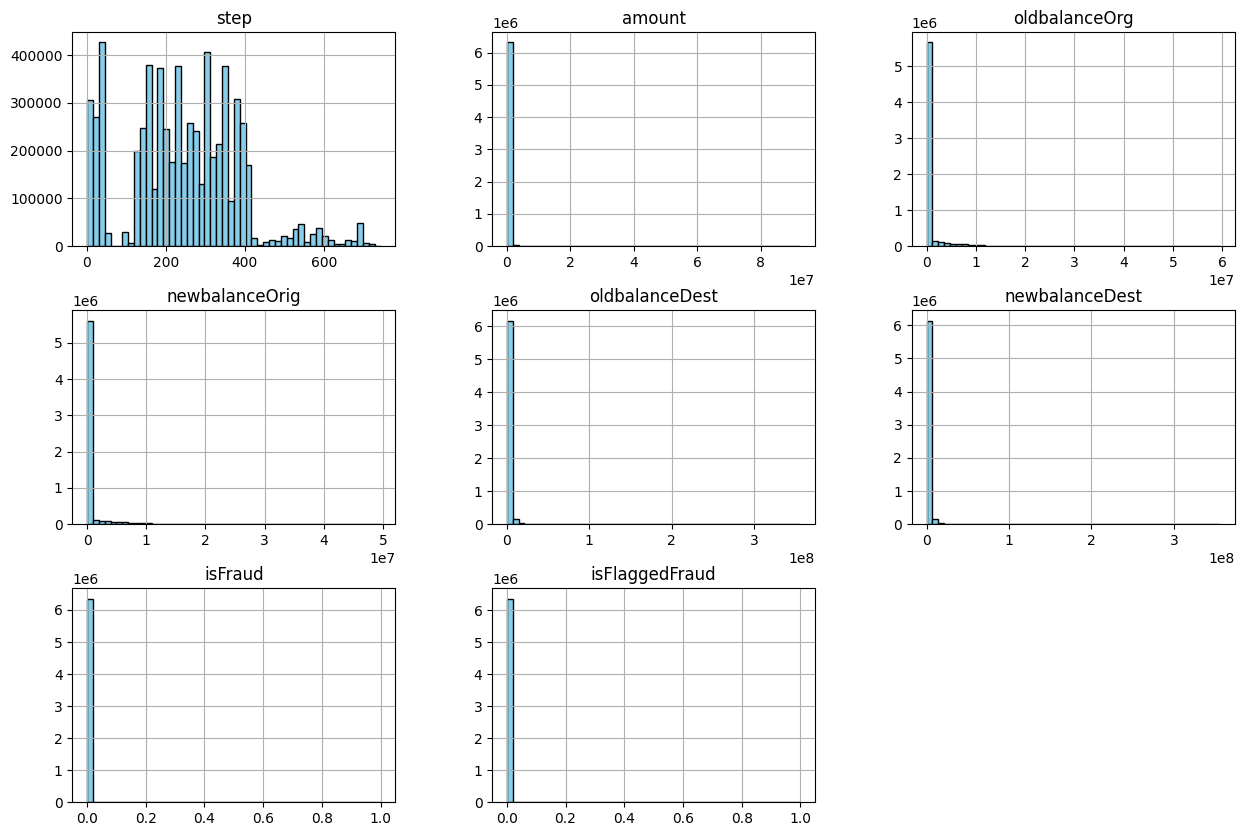

In [10]:
df.hist(bins=50, figsize=(15, 10), color='skyblue', edgecolor='black')

#### 3.4.1. Correlacion y Multicolinealidad

In [11]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


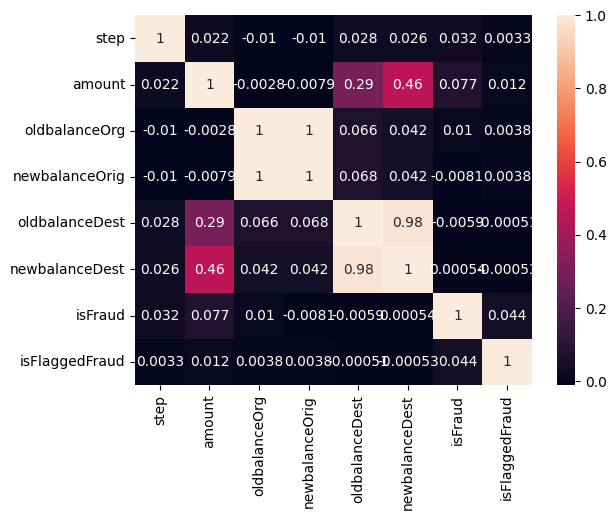

In [12]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

**Multicolinealidad entre las características independientes**

Se ha identificado una alta multicolinealidad entre las siguientes características:

- **('oldbalanceDest', 'newbalanceDest')** = 0.9766
- **('oldbalanceOrg', 'newbalanceOrg')** = 0.9988

Debido a esto, es necesario eliminar una de las dos características de cada par de correlaciones para reducir la multicolinealidad y mejorar la calidad del modelo.


# 4. Preprocesamiento de Datos

In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No hay valores nulos en el conjunto de datos

In [14]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [15]:
df.duplicated().sum()

0

Todas las transacciones con un **amount** igual a 0 son **transacciones fraudulentas**. Si el saldo de una cuenta es 0, no tiene sentido realizar una transferencia de dinero.  
Es probable que los agentes fraudulentos estén apuntando a cuentas aleatorias y no estén al tanto del saldo de las mismas.  

In [16]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [17]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


La todas las transacciones que están marcadas como fraude son en realidad transacciones fraudulentas

In [18]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Si el valor de **amount** es igual a **oldbalanceOrg**, la transacción es **fraudulenta**. Esto indica que los agentes fraudulentos, al conocer el saldo total de la cuenta objetivo, intentaron transferir la totalidad de los fondos disponibles a sus cuentas de destino.  

In [19]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

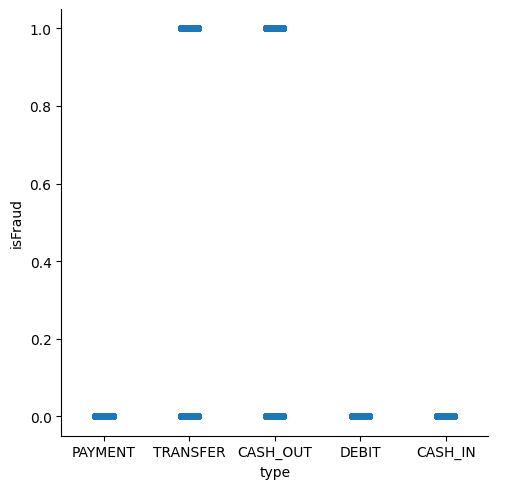

In [20]:
sns.catplot(data=df, x="type", y="isFraud")

La mayoría de las transacciones fraudulentas se realizan en los tipos 'TRANSFER' y 'CASH_OUT'.

In [21]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [22]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


Está claro que los agentes fraudulentos solo apuntaron a los tipos de transacciones 'CASH_OUT' y 'TRANSFER', ya que el 100% de las transacciones fraudulentas están dentro de estos dos tipos.

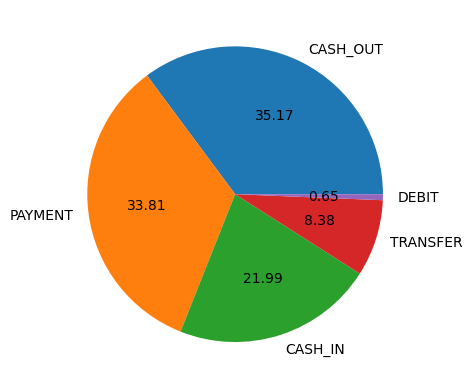

In [23]:
plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Aproximadamente el 69% de las transacciones son de tipo 'CASH_OUT' y 'PAYMENT', por lo que los agentes fraudulentos apuntaron a estos dos tipos

##4.1. Detección de valores atípicos

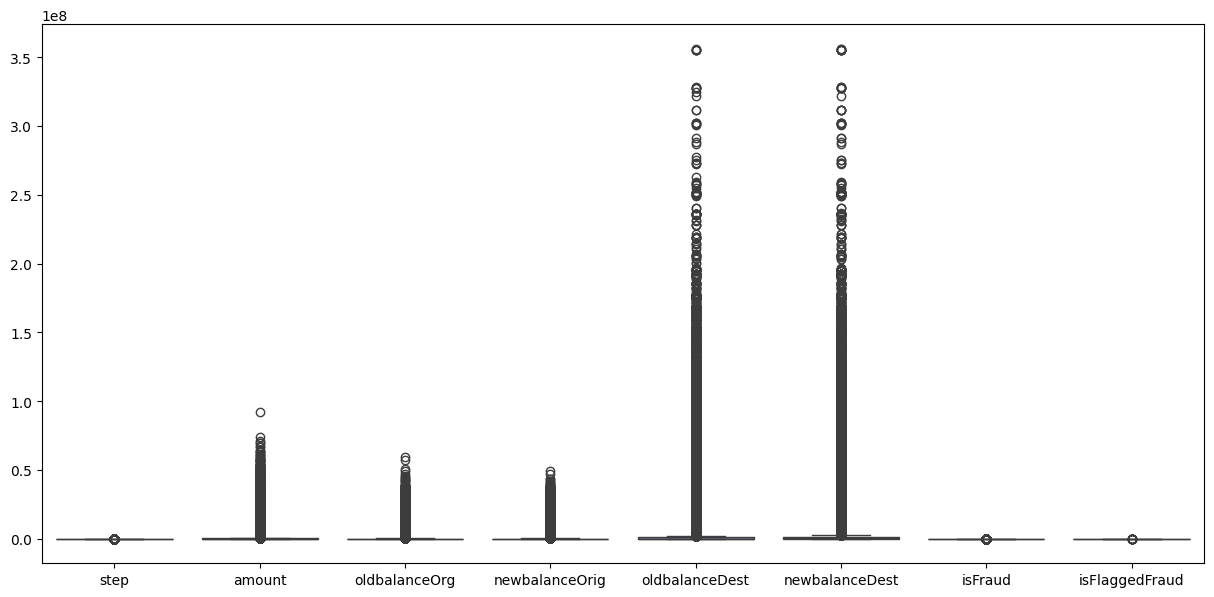

In [24]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(df)
plt.show()

In [25]:
per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("Límite superior :- ",up_limit)
print("Límite inferior :- ",low_limit)

Límite superior :-  603.5
Límite inferior :-  -112.5


In [26]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.48,C454938739,714218.48,0.0,C482986731,0.00,0.00,1,0
6259933,604,CASH_OUT,714218.48,C1835708623,714218.48,0.0,C1881116283,106940.83,821159.31,1,0
6259934,604,TRANSFER,277582.53,C2144116571,277582.53,0.0,C570246252,0.00,0.00,1,0
6259935,604,CASH_OUT,277582.53,C1512896686,277582.53,0.0,C731882373,0.00,277582.53,1,0
6259936,604,TRANSFER,4672401.04,C801580496,4672401.04,0.0,C1917884973,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


"Hay más de 100,000 registros considerados como outliers en la característica 'step'.
No podemos eliminar estos registros debido a su valor.

Y,
otras características independientes (numéricas) representan 'amount' (transacción de dinero),
por lo que eliminar estas columnas no es una buena opción,
porque un 'amount' más alto puede tener una mayor probabilidad de denotar una transacción fraudulenta."

In [27]:
correlation_matrix = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                         'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()
print(correlation_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

Existe multicolinealidad entre las siguientes características independientes:

- `'oldbalanceDest'` y `'newbalanceDest'` con una correlación de **0.9766**
- `'oldbalanceOrg'` y `'newbalanceOrig'` con una correlación de **0.9988**

La mejor opción es eliminar las siguientes características:

- `'newbalanceOrig'`
- `'newbalanceDest'`

Esto se debe a que están menos correlacionadas con la característica dependiente **"isFraud"**, en comparación con las otras dos características.

# 5. Selección de características

La función se utiliza para almacenar los nombres de las columnas no importantes (solo numéricas), y emplea el tipo **set()**, que garantiza que solo se almacenen valores únicos, evitando que se registren nombres de columnas duplicados.


In [28]:
def correlation(dataset, threshold):
    """
    Se usa para almacenar los nombres de columnas no importantes,
    y el tipo set() almacena solo valores únicos, por lo que no se
    almacenarán nombres de columnas duplicados.
    """
    column_corr = set()

    # Filtrando solo las columnas numéricas
    dataset_numeric = dataset.select_dtypes(include=['number'])

    # Almacenando la matriz de correlación
    corr_matrix = dataset_numeric.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Comparando los valores de correlación con el threshold
            if corr_matrix.iloc[i, j] > threshold:
                # Si es cierto, obtener el nombre de la columna
                colname = corr_matrix.columns[i]
                # Agregando el nombre de la columna a la variable column_corr
                column_corr.add(colname)

    return column_corr

In [29]:
correlated_features=correlation(df,0.9)

llamando ... con el valor hreshold 0.9

In [30]:
len(set(correlated_features))

2

Número total de características no importantes

In [31]:
correlated_features

{'newbalanceDest', 'newbalanceOrig'}

Nombres de estas columnas (independent features)

In [32]:
df=df.drop(correlated_features,axis=1)

Eliminando estas características del DataFrame

In [33]:
#Después de eliminar ...
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


Comprobando las variaciones de los datos en las características. Si la variación es cero (0), significa que esa columna (característica) no tiene ninguna correlación con las características dependientes, y necesitamos eliminar esa columna.


In [34]:
"""
threshold=0 significa que la característica tiene solo un valor (sin variación)
threshold=1 significa que la característica tiene 2 valores diferentes (small variation)
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

"True: - tiene variaciones
False: - no tiene variaciones"

In [35]:
#threshold=1
Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

"La característica **'isFlaggedFraud'** tiene baja variación en los datos,
pero no podemos eliminar esa columna, porque contiene estos dos valores (0,1),
lo cual ayuda a identificar si nuestra transacción es fraudulenta o no,
y también muestra una buena correlación con la característica dependiente (característica objetivo).
Por lo tanto, eliminar esta característica no es una buena opción."

Comprobando si las características categóricas son útiles o no.

In [36]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
nameDest           object
oldbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Tenemos 3 características categóricas: "type", "nameOrig" y "nameDest"

In [37]:
print(" La característica type tiene estos valores únicos:- \n",df["type"].unique())
print("\n\n nameOrig tiene estos valores únicos :- \n",df["nameOrig"].unique())
print("\n\n nameDest tiene estos valores únicos :- \n",df["nameDest"].unique())

 La característica type tiene estos valores únicos:- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig tiene estos valores únicos :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest tiene estos valores únicos :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


Tenemos 4 valores únicos en la característica 'type',
y 'nameOrig' y 'nameDest' contienen más valores únicos.
Vamos a comprobar su cantidad...

In [38]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [39]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

La mayoría de los datos dentro de 'nameOrig' y 'nameDest' son únicos (aproximadamente el 90% y el 60%), lo que significa que no serán útiles para el entrenamiento del modelo.
Por lo tanto, una buena opción es eliminarlos.
Y además, son solo nombres de cuentas

In [40]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [41]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


### 5.1. Feature Encoding

Solo hay una columna categórica (feature) que es 'type

In [42]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [43]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Reemplazaremos la clase con mayor cantidad por un número mayor,
de modo que ayudará al modelo a comprender mejor los patrones de los datos durante el entrenamiento

In [44]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [45]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,0.0,0,0
1,1,4,1864.28,21249.0,0.0,0,0
2,1,2,181.00,181.0,0.0,1,0
3,1,5,181.00,181.0,21182.0,1,0
4,1,4,11668.14,41554.0,0.0,0,0


In [46]:
df["type"].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [47]:
df["type"].value_counts()

type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

# 6. Manejo de datos desbalanceados

In [48]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Creando 2 nuevos DataFrames,
uno que contiene transacciones
fraudulentas y otro que contiene
transacciones genuinas

In [49]:
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [50]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,0.0,0,0
1,1,4,1864.28,21249.0,0.0,0,0
4,1,4,11668.14,41554.0,0.0,0,0
5,1,4,7817.71,53860.0,0.0,0,0
6,1,4,7107.77,183195.0,0.0,0,0


In [51]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0,181.0,0.0,1,0
3,1,5,181.0,181.0,21182.0,1,0
251,1,2,2806.0,2806.0,0.0,1,0
252,1,5,2806.0,2806.0,26202.0,1,0
680,1,2,20128.0,20128.0,0.0,1,0


In [52]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


Tomando 8213 registros aleatorios de normal_transaction

In [53]:
normal_transaction=normal_transaction.sample(n=8213)

Ahora, tenemos un 50-50% de datos de transacciones fraudulentas y normales. El siguiente paso es concatenarlos.

In [54]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [55]:
normal_transaction['amount'].describe()

count    8.213000e+03
mean     1.715209e+05
std      4.610107e+05
min      5.360000e+00
25%      1.272846e+04
50%      7.340421e+04
75%      2.041652e+05
max      1.488848e+07
Name: amount, dtype: float64

La media de las transacciones normales es menor en comparación con las transacciones fraudulentas

In [56]:
fraud_transaction['amount'].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

La media de las transacciones fraudulentas es más alta que la de las transacciones normales

In [57]:
# Concatenando estos dos conjuntos de datos para resolver el problema de un
#conjunto de datos desbalanceado.

# axis=0 significa agregar en filas.
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [58]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6096842,522,3,171180.37,2733946.01,185700.03,0,0
1831992,163,4,6450.03,103723.03,0.00,0,0
4219218,305,5,233415.38,30491.00,0.00,0,0
6027888,471,5,34104.45,0.00,271083.46,0,0
3348797,253,5,256571.82,11683.00,216587.38,0,0


In [59]:
new_df.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.13,339682.13,0.00,1,0
6362616,743,2,6311409.28,6311409.28,0.00,1,0
6362617,743,5,6311409.28,6311409.28,68488.84,1,0
6362618,743,2,850002.52,850002.52,0.00,1,0
6362619,743,5,850002.52,850002.52,6510099.11,1,0


NOTA: El dataset de 'Fraud_transcation' se ha añadido al final del dataset de 'normal_transcation'."

In [60]:
new_df.shape

(16426, 7)

# 7. División de entrenamiento y prueba

In [61]:
# Características independientes
X=new_df.drop("isFraud",axis=1)

# Características dependientes
y=new_df["isFraud"]

In [62]:
X.shape

(16426, 6)

In [63]:
y.shape

(16426,)

Estratificar distribuirá los valores de los datos de manera uniforme

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [65]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [66]:
y_test.value_counts()

isFraud
0    1643
1    1643
Name: count, dtype: int64

In [67]:
y_train.value_counts()

isFraud
1    6570
0    6570
Name: count, dtype: int64


Nuestra variable **"isFraud"** está distribuida de manera uniforme entre los datos de entrenamiento y prueba.

# 8. Feature Scaling

In [68]:
scaler=StandardScaler()

In [69]:
scaler.fit(x_train)

StandardScaler()

In [71]:
x_train_scaler=scaler.transform(x_train)

In [70]:
x_test_scaler=scaler.transform(x_test)

In [72]:
x_train_scaler

array([[-0.5963408 , -1.34628619, -0.38398181, -0.34678485, -0.24497762,
        -0.0302337 ],
       [-0.30663932, -1.34628619, -0.2984265 , -0.29793898, -0.24497762,
        -0.0302337 ],
       [ 1.94889366,  0.99265614,  4.97104276,  2.71054546, -0.22795845,
        -0.0302337 ],
       ...,
       [-1.3568072 ,  0.99265614, -0.29149306, -0.38181295, -0.09986397,
        -0.0302337 ],
       [ 0.3814017 ,  0.99265614,  0.34825863,  0.07127129, -0.24497762,
        -0.0302337 ],
       [ 0.83147365,  0.99265614,  1.94718309,  0.98414109, -0.18792508,
        -0.0302337 ]])

In [73]:
x_test_scaler

array([[-0.90156201,  0.2130087 , -0.44355266, -0.37507749, -0.24497762,
        -0.0302337 ],
       [-0.13074913,  0.2130087 , -0.42756009, -0.38181295, -0.24497762,
        -0.0302337 ],
       [-1.4964847 ,  0.99265614, -0.40028057, -0.38181295,  1.51011414,
        -0.0302337 ],
       ...,
       [-0.90156201, -0.56663874, -0.38251635, -0.33844696, -0.2410099 ,
        -0.0302337 ],
       [-0.14626886,  0.2130087 , -0.44161879, -0.37668719, -0.24497762,
        -0.0302337 ],
       [-1.32059451,  0.99265614, -0.39163723, -0.35115554, -0.23625721,
        -0.0302337 ]])

# 9. Entrenamiento y evaluación del modelo

### 9.1. Logistic Regression

In [74]:
log_model=LogisticRegression()

In [75]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [76]:
y_pred=log_model.predict(x_test_scaler)

In [77]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
78.0279975654291
- - - - - - - - - - -


## 9.2. Random Forest Classifier

In [78]:
rand_model=RandomForestClassifier()

In [79]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [80]:
y_pred=rand_model.predict(x_test_scaler)

In [81]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.23493609251369
- - - - - - - - - - -


## 9.3. Support Vector Machine ( SVM )

In [82]:
svm_model=SVC()

In [83]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [84]:
y_pred=svm_model.predict(x_test_scaler)

In [85]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
88.80097382836276
- - - - - - - - - - -


### 9.4. BernoulliNB

In [86]:
bnb_model=BernoulliNB()

In [87]:
bnb_model.fit(x_train_scaler,y_train)

BernoulliNB()

In [88]:
y_pred=bnb_model.predict(x_test_scaler)

In [89]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
69.78088861838101
- - - - - - - - - - -


### 9.5. GaussianNB

In [90]:
gnb_model=GaussianNB()

In [91]:
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [92]:
y_pred=gnb_model.predict(x_test_scaler)

In [93]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
57.912355447352404
- - - - - - - - - - -


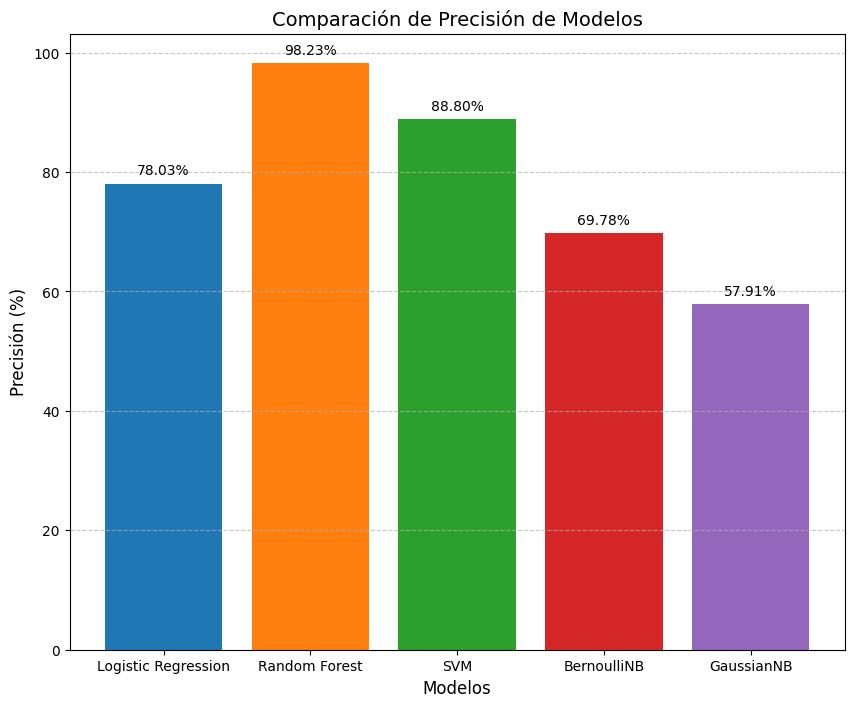

In [94]:
# Modelos entrenados
models = {
    'Logistic Regression': log_model,'Random Forest': rand_model, 'SVM': svm_model, 'BernoulliNB': bnb_model, 'GaussianNB': gnb_model
}

accuracies = []

for model_name, model in models.items():
    y_pred = model.predict(x_test_scaler)
    accuracy = accuracy_score(y_test.values, y_pred) * 100
    accuracies.append(accuracy)


plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = plt.bar(models.keys(), accuracies, color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)


plt.title('Comparación de Precisión de Modelos', fontsize=14)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Precisión (%)', fontsize=12)

# Agregar una cuadrícula para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Conclusión
Seleccionado: Random Forest Classifier

# 10. Preparando el modelo para su implementación

In [95]:
import pickle

In [96]:
pickle.dump(rand_model,open('model.sav','wb'))

In [97]:
# guardando el objeto StandardScaler 'scaler'
pickle.dump(scaler,open('scaler.sav','wb'))

Vamos a verificar si nuestro modelo está funcionando correctamente o no

In [98]:
rand_model=pickle.load(open('model.sav','rb'))

In [99]:
# cargando el archivo del scaler para escalar el array de entrada
new_scaler=pickle.load(open('scaler.sav','rb'))

In [100]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6096842,522,3,171180.37,2733946.01,185700.03,0,0
1831992,163,4,6450.03,103723.03,0.00,0,0
4219218,305,5,233415.38,30491.00,0.00,0,0
6027888,471,5,34104.45,0.00,271083.46,0,0
3348797,253,5,256571.82,11683.00,216587.38,0,0


In [101]:
# creando un ndarray para pasar este array como datos de entrada.
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [102]:
# escalando los puntos de datos del input_array

input_array_scale=new_scaler.transform(input_array)
input_array_scale

c:\Users\luiss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41527738,  0.99265614, -0.38165818, -0.38181295, -0.18164827,
        -0.0302337 ]])

In [103]:
pred=rand_model.predict(input_array_scale)
pred

array([0], dtype=int64)

### La predicción es correcta

# 11.**Conclusión Final**

1. **Valores Faltantes y Duplicados:**
   - No se encuentran valores faltantes ni duplicados en el conjunto de datos.

2. **Valores Atípicos:**
   - Se identificaron valores atípicos, pero no se recomienda eliminarlos, ya que los valores altos en "amount" y "oldbalanceOrig" tienen una mayor probabilidad de estar relacionados con transacciones fraudulentas.

3. **Multicolinealidad:**
   - Se detectó multicolinealidad en algunas columnas, por lo que se eliminó una de ellas para mejorar la precisión del modelo.

4. **Características Clave:**
   - "amount" y "isFlaggedFraud" son características clave, ya que influyen directamente en la predicción de fraude.
   - Es importante centrarse en transacciones de gran valor y en los casos donde "amount" es igual a "oldbalanceOrig".

